<h1>Project: Dengue Data Analysis</h1>
<h3>Analyst: Jiro Miko S. Viñas</h3>

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset\\dengue.csv')
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
df.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
df["Month"] = df["Month"].astype("category")
df["Region"] = df["Region"].astype("category")

<h1>Q1. What is the overall monthly trend of dengue cases across all years?</h1>

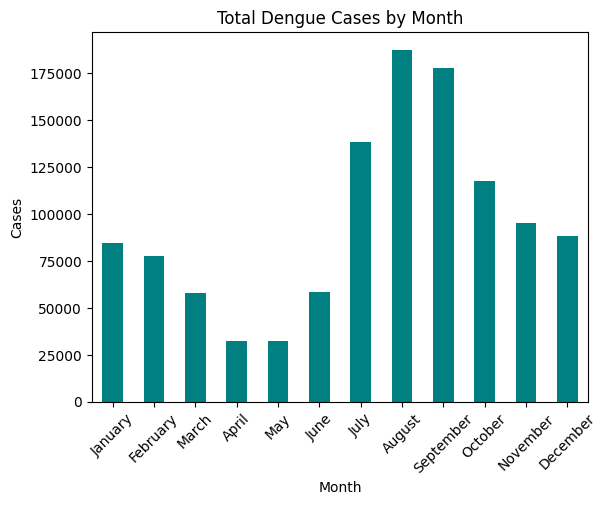

In [53]:
monthly_cases = df.groupby('Month')['Dengue_Cases'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

monthly_cases.plot(kind='bar', color='teal')
plt.title('Total Dengue Cases by Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()

<h2>Insight: The overall monthly trend of dengue cases shows significant peaks in July, August, and September, while the months from January to May experience notably lower case numbers.</h2>

<h1>Q2. How do deaths change by month across all regions?</h1>

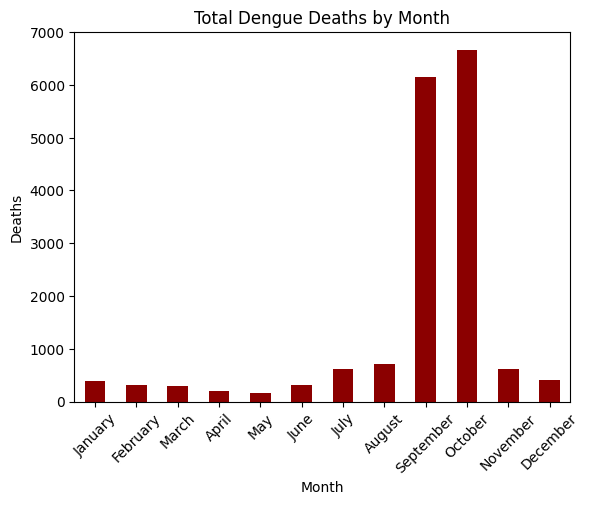

In [56]:
death_month = df.groupby('Month')['Dengue_Deaths'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
)
death_month.plot(kind='bar', color='darkred')
plt.title('Total Dengue Deaths by Month')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()

<h2>Insight: Dengue-related deaths gradually increase from June to August, then spike sharply in September and October, before declining again in the following months.</h2>

<h1>Q3. What is the average number of deaths compared to cases per year?</h1>

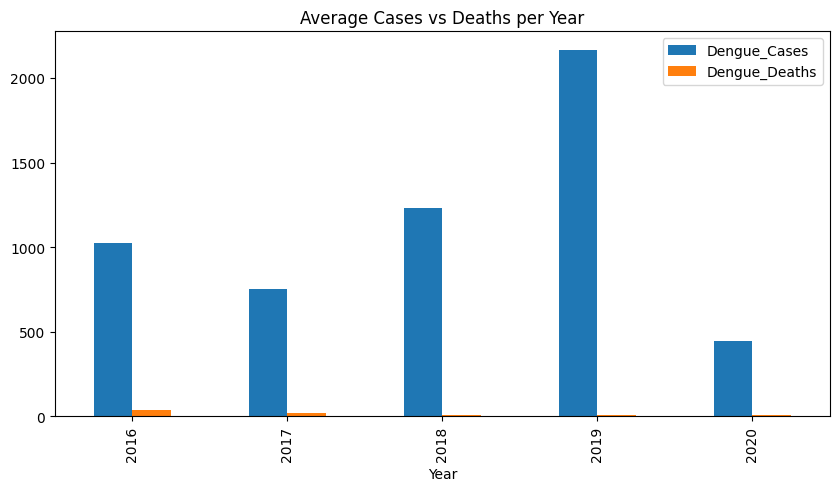

In [57]:
avg = df.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].mean()
avg.plot(kind='bar', figsize=(10, 5))
plt.title('Average Cases vs Deaths per Year')
plt.show()

<h2>Insight: 
In 2019, dengue cases were the highest, but average deaths were highest in 2016, showing that more cases don’t always mean more deaths.</h2>

<h1>Q4. What percent of cases led to deaths each year?</h1>

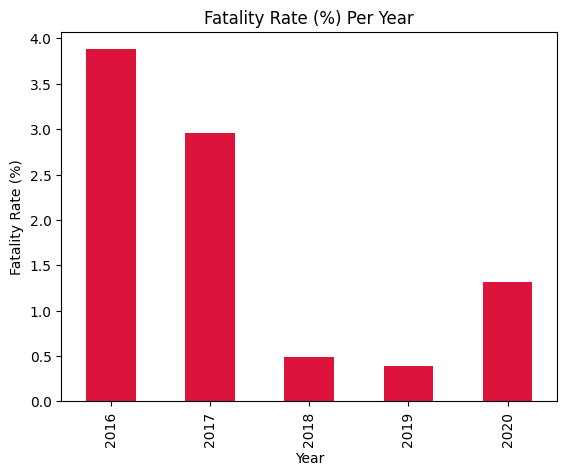

In [58]:
df_yearly = df.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
df_yearly['Fatality_Rate (%)'] = (df_yearly['Dengue_Deaths'] / df_yearly['Dengue_Cases']) * 100

df_yearly['Fatality_Rate (%)'].plot(kind='bar', color='crimson')
plt.title('Fatality Rate (%) Per Year')
plt.ylabel('Fatality Rate (%)')
plt.show()

<h2>Insight: The fatality rate was highest in 2016 (3.88%) and lowest in 2019 (0.39%), showing a general decline in death rates over the years despite fluctuations in case numbers.</h2>

<h1>Q5. How do cases and deaths compare across different regions?</h1>

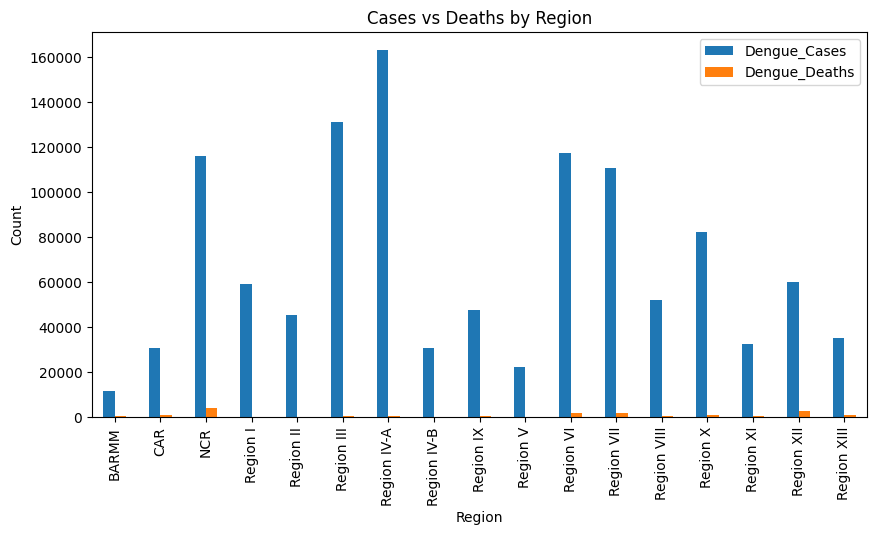

In [62]:
region = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
region.plot(kind='bar', figsize=(10, 5))
plt.title('Cases vs Deaths by Region')
plt.ylabel('Count')
plt.show()

<h2>Insight: Region IV-A had the highest number of cases, while NCR recorded the most deaths, showing that regions with more cases don’t always have the highest deaths.</h2>

<h1>Q6. Which region has the highest number of deaths?</h1>

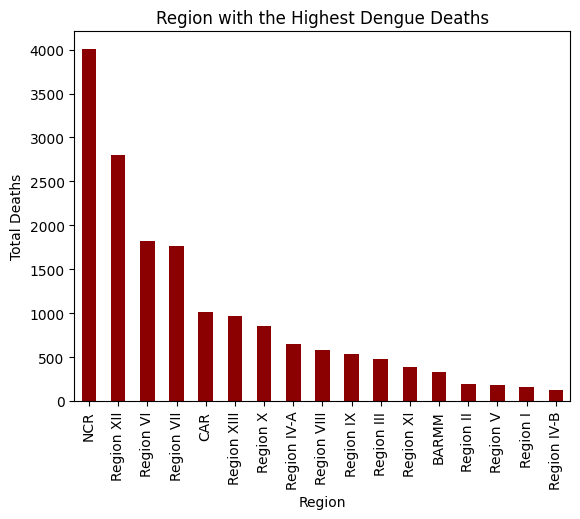

In [61]:
region = df.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
region.plot(kind='bar', color='darkred')
plt.title('Region with the Highest Dengue Deaths')
plt.ylabel('Total Deaths')
plt.show()

<h2>Insight: The NCR (National Capital Region) has the highest number of dengue-related deaths, with a total of 4,008 deaths.</h2>

<h1>Q7. Which region has the highest number of cases?</h1>

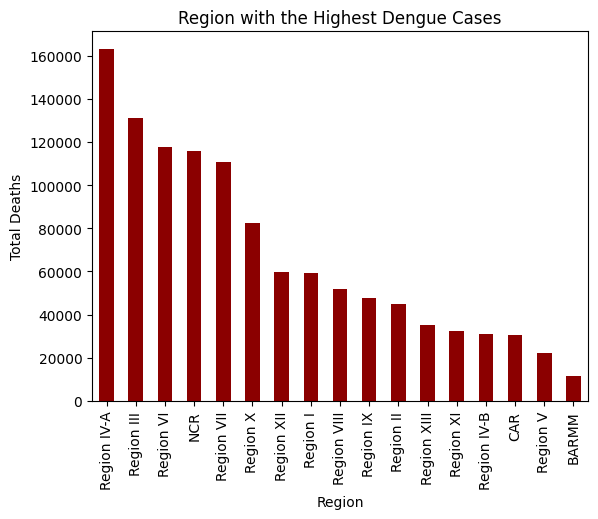

In [64]:
region_c = df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
region_c.plot(kind='bar', color='darkred')
plt.title('Region with the Highest Dengue Cases')
plt.ylabel('Total Deaths')
plt.show()

<h2>Insight: Region IV-A recorded the highest number of dengue cases, with a total of 163,029 cases.</h2>

<h1>Q8. What is the trend in dengue deaths over the years?</h1>

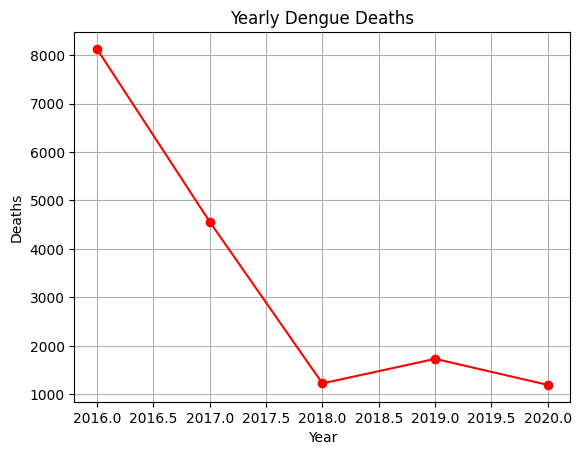

In [66]:
trend = df.groupby('Year')['Dengue_Deaths'].sum()
trend.plot(marker='o', color='red')
plt.title('Yearly Dengue Deaths')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

<h2>Insight: Dengue deaths have decreased significantly from 2016 to 2020, with the highest in 2016 and a steady decline in the following years.</h2>

<h1>Q9. What is the trend in dengue cases over the years?</h1>

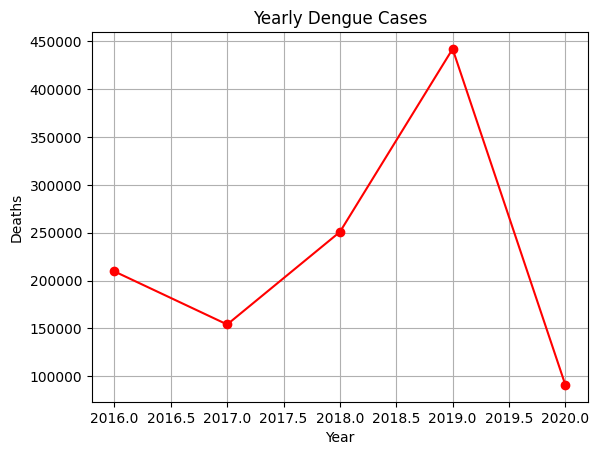

In [68]:
trend_c = df.groupby('Year')['Dengue_Cases'].sum()
trend_c.plot(marker='o', color='red')
plt.title('Yearly Dengue Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

<h2>Insight: Dengue cases peaked in 2019 and then dropped sharply in 2020.</h2>

<h1>Q10. Are there months where all regions have zero deaths?</h1>

In [69]:
zero_death_months = df.groupby('Month')['Dengue_Deaths'].sum()
zero_death_months = zero_death_months[zero_death_months == 0]
print(zero_death_months)


Series([], Name: Dengue_Deaths, dtype: int64)


<h2>Insight: There are no months where all regions have zero deaths</h2>

<h1>Q11. Which are the top 5 most deadly months based on total deaths?</h1>

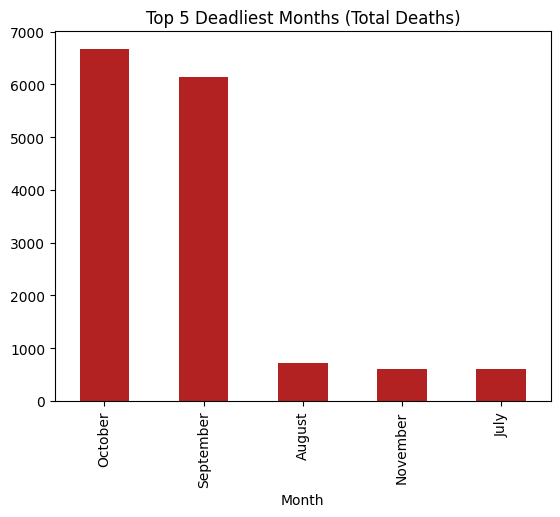

In [72]:
top5_deadly_months = df.groupby('Month')['Dengue_Deaths'].sum().sort_values(ascending=False).head(5)
top5_deadly_months.plot(kind='bar', color='firebrick')
plt.title('Top 5 Deadliest Months (Total Deaths)')
plt.show()

<h2>Insight: The top 5 most deadly months based on total deaths are: October (6,670 deaths), September (6,148 deaths), August (714 deaths), November (613 deaths), July (611 deaths)</h2>

<h1>Q12. Are there months where the number of deaths exceeded the number of cases?</h1>

In [73]:
anomalies = df[df['Dengue_Deaths'] > df['Dengue_Cases']]
anomalies[['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths']]

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
381,October,2017,Region VI,488,668
441,October,2017,Region VII,421,584
501,October,2017,Region VIII,144,236
560,September,2017,Region IX,115,116
561,October,2017,Region IX,108,176
621,October,2017,Region X,227,282
681,October,2017,Region XI,58,72
729,October,2016,Region XII,928,1270
777,October,2020,Region XII,76,80
789,October,2016,Region XIII,277,481


<h2>Insight: There are months where the number of deaths exceeded the number of cases, particularly in October 2016 and October 2017, across various regions such as Region VI, Region VII, Region IX, and NCR, among others.</h2>

<h1>Q13. Identify months where deaths are increasing year-over-year</h1>

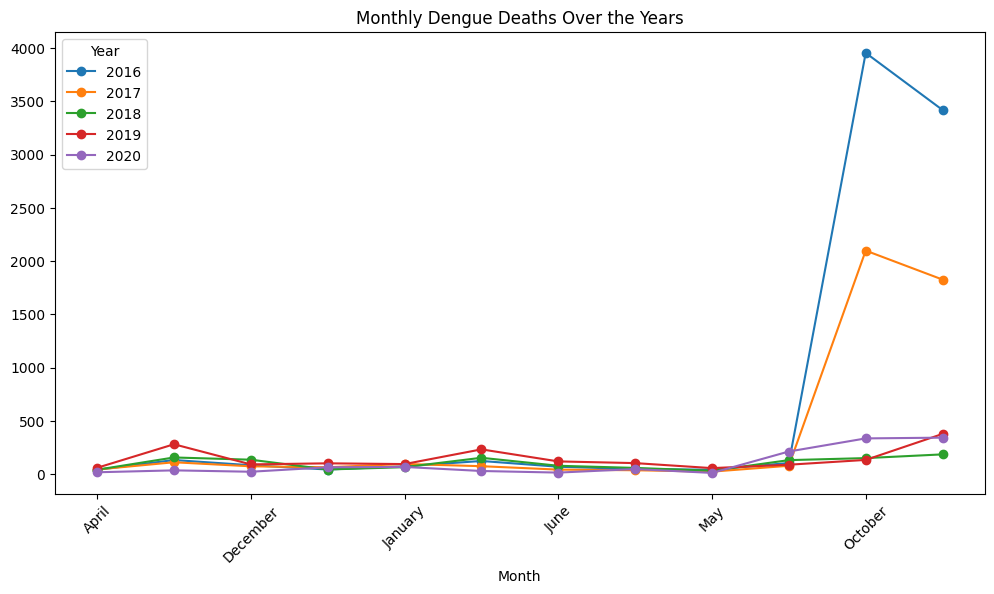

In [76]:
pivot = df.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().unstack()
pivot.T.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Dengue Deaths Over the Years')
plt.xticks(rotation=45)
plt.show()

<h2>Insight: Deaths increased year-over-year in August and July from 2016 to 2019, but declined in 2020, while October saw a significant decrease in deaths from 2016 to 2020.</h2>

<h1>Q14. Are there specific years where deaths sharply drop?</h1>

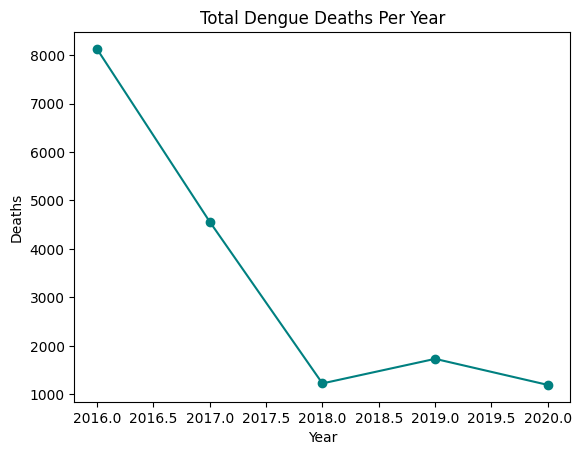

In [78]:
yearly_deaths = df.groupby('Year')['Dengue_Deaths'].sum()
yearly_deaths.plot(marker='o', linestyle='-', color='teal')
plt.title('Total Dengue Deaths Per Year')
plt.ylabel('Deaths')
plt.show()

<h2>Insight: Deaths sharply dropped from 2016 to 2017, from 4,563 in 2017 to 1,226 in 2018, and again from 1,733 in 2019 to 1,195 in 2020.</h2>

<h1>Q16. Which months have 0 deaths</h1>

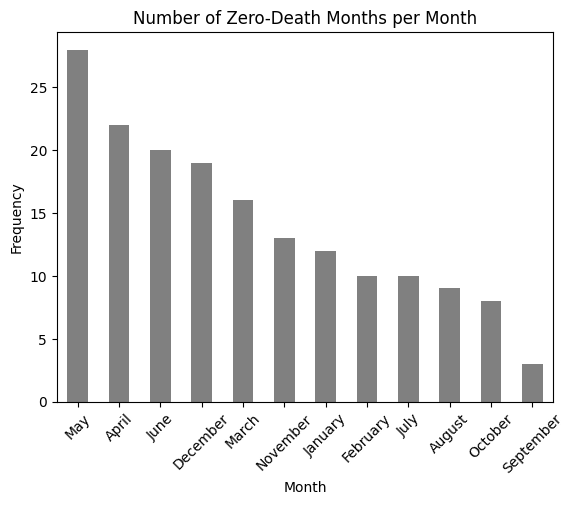

In [79]:
zero_deaths = df[df['Dengue_Deaths'] == 0]['Month'].value_counts()
zero_deaths.plot(kind='bar', color='gray')
plt.title('Number of Zero-Death Months per Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<h2>Insight: Most months with zero deaths are in the first half of the year, with May having the most, and the number of zero deaths drops towards the end of the year, especially in September.</h2>

<h1>Q17. How many months had more than 100 deaths across the dataset?</h1>

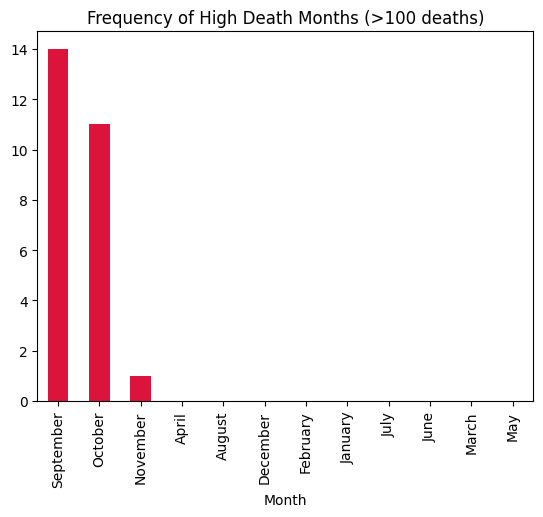

In [81]:
high_death_months = df[df['Dengue_Deaths'] > 100]
high_death_months['Month'].value_counts().plot(kind='bar', color='crimson')
plt.title('Frequency of High Death Months (>100 deaths)')
plt.show()

<h2>Insight: There are 3 months have more than 100 deaths across the dataset and those months are September, October and November</h2>

<h1>Q18. Is there correlation between Dengue Cases and Dengue Deaths</h1>

In [36]:
df['Dengue_Cases'].corr(df['Dengue_Deaths'])

0.03832213720419492

<h2>Insight: There are no correlation between Dengue Cases and Dengue Deaths</h2>

<h1>Q19. What Region have the Least Dengue Cases</h1>

<Axes: xlabel='Region'>

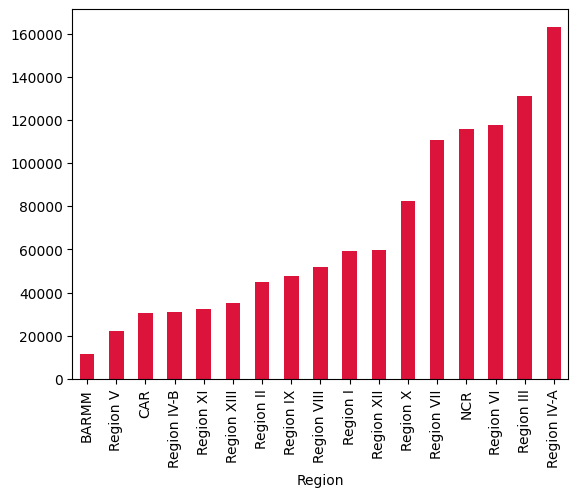

In [51]:
least_cases = df.groupby('Region')['Dengue_Cases'].sum().sort_values()
least_cases.plot(kind='bar', color='crimson')

<h2>Insight: The Region have the Least Dengue Cases is BARMM</h2>

<h1>Q20. What Region have the Least Dengue Deaths</h1>

<Axes: xlabel='Region'>

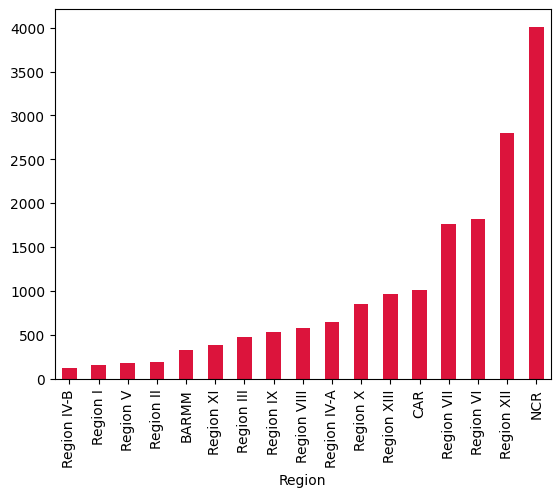

In [50]:
least_deaths = df.groupby('Region')['Dengue_Deaths'].sum().sort_values()
least_deaths.plot(kind='bar', color='crimson')

<h2>Insight: The Region have the Least Dengue Deaths is Region IV-B</h2>